# AI CA5 Phase1
# Amirhossein Alizad 810197546

<strong> we are going to read the Data ( train and test ) from a fashion-mnist Dataset provided for us which every data has 784 pixel datas showing the darkness of each pixel. each row of data is a 28 * 28 picture of a product which we are going to predict the class of each product by implementing a feed forward neural network and train the network using train data and then testing it</strong>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
import seaborn as sns

# Data Reading and PreProcessing

In [2]:
trainData = pd.read_csv("trainData.csv", header=None)
testData = pd.read_csv("testData.csv", header = None)
trainLabels = pd.read_csv("trainLabels.csv", header=None)
testLabels = pd.read_csv("testLabels.csv", header=None)

<strong> using pandas to read from files</strong>

In [3]:
trainData.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
testData.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0


In [5]:
len1 = len(trainData.to_numpy())
lst = []
for i in range(10):
    for j in range(len1):
        if(trainLabels.to_numpy()[j] == i):
            with np.printoptions(precision=4, suppress=True, linewidth=100):
                lst.append(trainData.to_numpy()[j])
            break
            

<strong> using pd.to_numpy() to convert data frame into numpy array or matrix and then printing the first element of each class</strong>

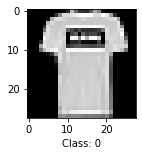

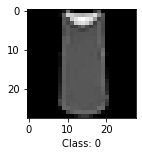

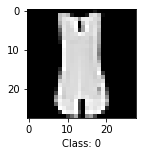

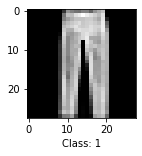

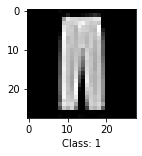

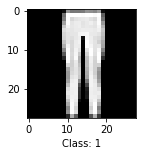

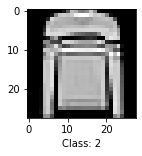

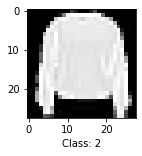

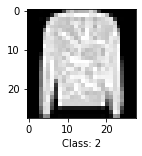

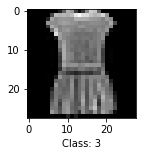

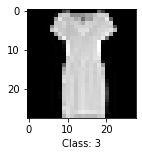

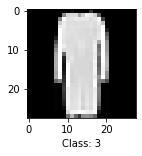

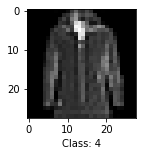

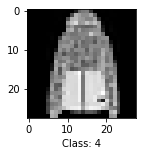

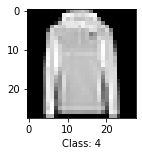

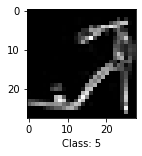

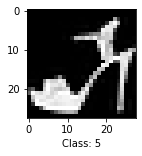

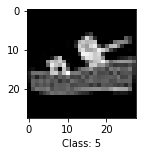

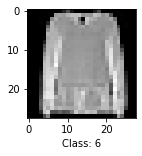

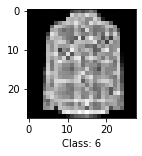

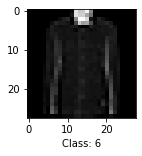

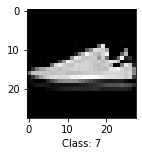

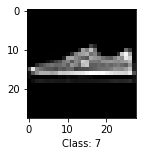

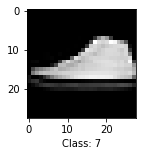

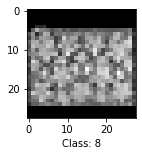

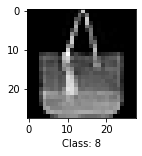

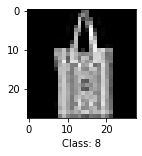

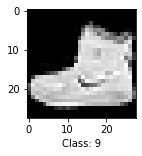

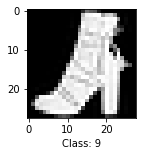

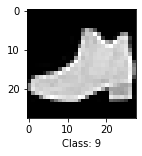

In [6]:
for i in range(10):
    for j in range(3):
        plt.figure(figsize=(2,2))
        image = np.array(trainData.iloc[np.where(trainLabels[0] == i)[0][j]], dtype = float)
        plt.imshow(image.reshape((28, 28)), cmap = 'gray')
        plt.xlabel('Class: '+str(i))
        plt.show()

In [7]:
unique, counts = np.unique(trainLabels.to_numpy(), return_counts=True)
train_dict = dict(zip(unique, counts))
unique, counts = np.unique(testLabels.to_numpy(), return_counts=True)
test_dict = dict(zip(unique, counts))
train_dict

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [8]:
test_dict

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

<AxesSubplot:xlabel='Value', ylabel='Count'>

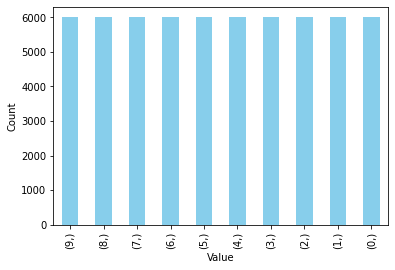

In [9]:
trainLabels.value_counts().plot(kind = 'bar', xlabel = 'Value', ylabel = 'Count', color = 'skyblue')

<AxesSubplot:xlabel='Value', ylabel='Count'>

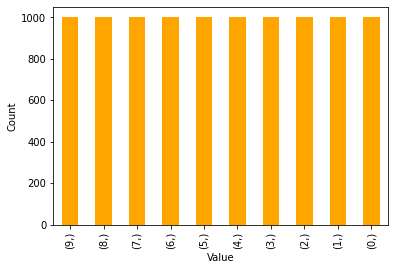

In [10]:
testLabels.value_counts().plot(kind = 'bar', xlabel = 'Value', ylabel = 'Count', color = 'orange')

In [11]:
trainLabels = np.genfromtxt('trainLabels.csv', delimiter=',')
testLabels = np.genfromtxt('testLabels.csv', delimiter=',')
trainData = trainData.to_numpy()
testData = testData.to_numpy()
trainData = trainData / 255
testData = testData / 255

<strong> first we convert the data frame to matrix and then we divide each element by 255 to normalize the data<br>
Among the best practices for training a Neural Network is to normalize your data to obtain a mean close to 0. Normalizing the data generally speeds up learning and leads to faster convergence.</strong>

# Dataloader

In [12]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        onehot_vectors = []
        for val in labels:
            row = [1 if i == val else 0 for i in range(n_classes)]
            onehot_vectors.append(row)
        onehot_vectors = np.asmatrix(onehot_vectors, dtype=float)
        return onehot_vectors
    
    def __shuffle_dataset(self):
        p = np.random.permutation(len(self.__data))
        self.__data = self.__data[p]
        self.__onehot_labels = self.__onehot_labels[p]
        
    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

In [13]:
def relu_func(x):
    return max(0, x)
def relu_derivative_func(x):
    if(x > 0):
        return 1
    return 0

def sigmoid_func(x):
    return 1/(1 + np.exp(-x))
def sigmoid_derivative_func(x):
    y = sigmoid_func(x)
    return y * (1 - y)


<strong> sigmoid and relu function prototypes</strong>

# Activation Functions

In [14]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    

    def __relu(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        relu_value = np.maximum(0, temp)
        return relu_value

    def derivative(self, matrix):
        relu_derivative = matrix
        relu_derivative[matrix<=0] = 0
        relu_derivative[matrix>0] = 1
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__relu(matrix)

class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = negative_slope
    
    def __val(self, matrix):
        matrix = np.where(matrix > 0, matrix, matrix * self.negative_slope)  
        leacky_relu_value = np.matrix(matrix, dtype=float)
        return leacky_relu_value

    def derivative(self, matrix):
        leacky_relu_derivative = np.matrix(matrix, dtype = float)
        leacky_relu_derivative[matrix<=0] = self.negative_slope
        leacky_relu_derivative[matrix>0] = 1
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        sigmoid_value = np.matrix(1/(1 + np.exp(-matrix)), dtype = float)
        return sigmoid_value

    def derivative(self, matrix):
        val = self.__call__(matrix)
        sigmoid_derivative = np.multiply(val, np.matrix(1 - val))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        matrix -= matrix.max(1)
        softmax_value = np.matrix(np.exp(matrix)/np.exp(matrix).sum(1), dtype=float)
        return softmax_value

    def derivative(self, matrix):
        softmax = self.__val(matrix)
        s = softmax
        return np.diagflat(s) - np.dot(s, s.T)
    
    def __call__(self, matrix):
        return self.__val(matrix)

class Tanh:
    def __init__(self): pass

    def __val(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        tanh_value = np.tanh(temp)
        return tanh_value

    def derivative(self, matrix):
        tanh_value = self.__val(matrix)
        tanh_derivative = 1 - np.multiply(tanh_value, tanh_value)
        return tanh_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

<strong>Activation functions are really important for an Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response/output variable. They introduce non-linear properties to the network. Their main purpose is to convert an input signal of a node in an Artificial Neural Network to an output signal. That output signal is used as an input in the next layer in the stack.</strong>

# Loss Function

In [15]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        p = Softmax()(true_val)
        cross_entropy_value = -np.multiply(expected_val, np.ma.log(p)).sum(1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)
        p = Softmax()(true_val)
        cross_entropy_derivative = p - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)

# Layer

In [16]:

class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'
                
        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        self.__last_input = layer_input
        self.__last_activation_input = np.matmul(layer_input, self.__weight) + self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        tp = self.__last_input.transpose()
        e_y = np.multiply(backprop_tensor,self.__last_activation_derivative)
        e_w = np.matmul(tp,e_y)
        backprop_tensor = np.matmul(e_y,self.__weight.transpose())
        self.__weight -= e_w*lr
        bu = np.matmul(np.matrix(np.tile(1, (1, e_y.shape[0]))),e_y)
        self.__bias -= bu*lr
        return backprop_tensor
    
    def get_layer_output(self):
        return self.__last_activation_output
    
    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.random.uniform(low, high, size=(dim1, dim2))
        weights = np.matrix(weights, dtype = float)
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.random.normal(mean, np.sqrt(var), size=(dim1, dim2))
        weights = np.matrix(weights, dtype = float)
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [17]:
class FeedForwardNN:
    
    def __init__(self, input_shape):
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None
        
        self.__train_list =[]
        self.__test_list = []
    
    def get_train_list(self):
        return self.__train_list
    
    def get_test_list(self):
        return self.__test_list
    
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        network_output = network_input
        for i in self.__layers_list:
            network_output = i.forward(network_output)
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
            self.__train_list =[]
            self.__test_list = []
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        out = self.forward(x_batch)
        self.__train_list.append((y_batch, self.__layers_list[-2].get_layer_output()))
        return (self.__compute_accuracy(out,y_batch), self.__update_weights(out, y_batch))    
        
    def __test_on_batch(self, x_batch, y_batch):
        out = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(out,y_batch)
        cross_entropy = CrossEntropy()
        batch_loss = cross_entropy(out, y_batch)
        batch_average_loss = np.sum(batch_loss)/len(out)
        self.__test_list.append((y_batch, self.__layers_list[-2].get_layer_output()))
        return (batch_accuracy, batch_average_loss)
    
    def __get_labels(self, outputs):
        labels = outputs.argmax(axis=1)
        return labels
    
    def __compute_accuracy(self, output, expected_output):
        output = np.array(output)
        result1 = np.argmax(output, axis=1)
        expected_output = np.array(expected_output)
        result2 = np.argmax(expected_output, axis=1)
        true = np.sum(result1 == result2)
        accuracy = true/len(result1)*100
        return accuracy
    
    
    def __update_weights(self, output, y_batch):
        cross_entropy = CrossEntropy()
        batch_loss = cross_entropy(output, y_batch)
        batch_average_loss = np.sum(batch_loss)/len(output)
        temp = cross_entropy.derivative(output, y_batch)
        for i in reversed(self.__layers_list):
            temp = i.update_weights(temp, self.__lr)
        return batch_average_loss

# Training Sample Code

<strong>1) using Relu function as activation:<br>
Advantages:<br>-non-linear: we can easily back propagate.<br>
    -accelerates the convergence of stochastic gradient descent compared to sigmoid and tanh.<br>
    -does not activate all the neurons at once.<br>
<br>
Disadvantages:<br>
    -The mean value of activation is not zero<br>
    -ReLU output is not zero-centered and it does hurt the neural network performance. The gradient of the weights during backpropagation are either all be positive, or all negative.<br>
    -The gradients for negative input are zero, which means for activations in that region, the weights are not updated during backpropagation.<br>
    -Non-differentiable at zero and ReLU is unbounded<br></strong>
    
    


## Learning rate

<strong>The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.Learning rate affects gradient descent process which tweaks our weights based on the error/loss value
</strong>


## using learning rates 0.001 - 0.01 - 0.1

In [18]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = []
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)



Epoch 1:
	Train: Average Accuracy: 70.09	Average Loss: 0.8430377390946014
	Test: Average Accuracy: 80.75079872204473	Average Loss: 0.5552760302753859
Epoch 2:
	Train: Average Accuracy: 82.33666666666667	Average Loss: 0.5046874670201117
	Test: Average Accuracy: 82.85742811501598	Average Loss: 0.4916881952269743
Epoch 3:
	Train: Average Accuracy: 83.93666666666667	Average Loss: 0.4594973772406103
	Test: Average Accuracy: 83.69608626198082	Average Loss: 0.46706203793557755
Epoch 4:
	Train: Average Accuracy: 84.78	Average Loss: 0.4331955102718853
	Test: Average Accuracy: 84.27515974440895	Average Loss: 0.4481343202202288
Epoch 5:
	Train: Average Accuracy: 85.48333333333333	Average Loss: 0.4138948228961788
	Test: Average Accuracy: 84.754392971246	Average Loss: 0.43678493355054143
Epoch 6:
	Train: Average Accuracy: 85.87833333333333	Average Loss: 0.3992487407484708
	Test: Average Accuracy: 84.83426517571885	Average Loss: 0.4296801078036868
Epoch 7:
	Train: Average Accuracy: 86.24333333333334

In [19]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.01
EPOCHS = 30
TRAINLOADER = []
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.005	Average Loss: 2.319154047493362
	Test: Average Accuracy: 10.003993610223642	Average Loss: 2.3039116233063517
Epoch 2:
	Train: Average Accuracy: 10.025	Average Loss: 2.3050794197681252
	Test: Average Accuracy: 10.003993610223642	Average Loss: 2.3039140584890463
Epoch 3:
	Train: Average Accuracy: 10.026666666666667	Average Loss: 2.305070957062711
	Test: Average Accuracy: 10.003993610223642	Average Loss: 2.303915760126706
Epoch 4:
	Train: Average Accuracy: 10.025	Average Loss: 2.3050616433957005
	Test: Average Accuracy: 10.003993610223642	Average Loss: 2.3039091465295587
Epoch 5:
	Train: Average Accuracy: 10.033333333333333	Average Loss: 2.3050349039859404
	Test: Average Accuracy: 10.003993610223642	Average Loss: 2.3039107773374585
Epoch 6:
	Train: Average Accuracy: 10.508333333333333	Average Loss: 2.29060230573007
	Test: Average Accuracy: 24.600638977635782	Average Loss: 1.8675888521728592
Epoch 7:
	Train: Average Accuracy: 23.783333333333335	Ave

In [20]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.1
EPOCHS = 30
TRAINLOADER = []
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(15, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 10.075	Average Loss: 2.3629329634166836
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.315587827602412
Epoch 2:
	Train: Average Accuracy: 10.063333333333333	Average Loss: 2.329339029886795
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.315587827602412
Epoch 3:
	Train: Average Accuracy: 10.063333333333333	Average Loss: 2.329339029886795
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.315587827602412
Epoch 4:
	Train: Average Accuracy: 10.063333333333333	Average Loss: 2.329339029886795
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.315587827602412
Epoch 5:
	Train: Average Accuracy: 10.063333333333333	Average Loss: 2.329339029886795
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.315587827602412
Epoch 6:
	Train: Average Accuracy: 10.063333333333333	Average Loss: 2.329339029886795
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.315587827602412
Epoch 7:
	Train: Average Accuracy: 10.0633333

<strong> as we can see by increasing the learning rate the functionality of Relu decreases and it becomes the worst possible outcome in the third option where lr = 0.1<br>
By decreasing the learning rate over the network, we decrease the changes in weights. In gradient descent learning algorithms such as error backpropagation, the learning rate parameter can have a significant effect on accuracy. In particular, decreasing the learning rate can significantly improve generalization accuracy, especially on large, complex problems.
</strong>

## Leaky Relu
<strong> a solution for Relu's problems. t has a negative slope for negative inputs, so the derivative will have a value to let the back-prop keep going.<br> we will divide all our values by 10 to avoid overflow</strong>

In [21]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = []
trainData = trainData / 10
testData = testData / 10
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=LeakyRelu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)



Epoch 1:
	Train: Average Accuracy: 32.655	Average Loss: 1.8960723323200026
	Test: Average Accuracy: 51.847044728434504	Average Loss: 1.3692576292556833
Epoch 2:
	Train: Average Accuracy: 59.83833333333333	Average Loss: 1.1365219683550862
	Test: Average Accuracy: 67.62180511182109	Average Loss: 0.9612749966782974
Epoch 3:
	Train: Average Accuracy: 70.99	Average Loss: 0.8387411142240122
	Test: Average Accuracy: 72.4341054313099	Average Loss: 0.7673311976414142
Epoch 4:
	Train: Average Accuracy: 74.06333333333333	Average Loss: 0.7143344406711067
	Test: Average Accuracy: 74.38099041533546	Average Loss: 0.6947683591741187
Epoch 5:
	Train: Average Accuracy: 75.935	Average Loss: 0.6593756786188317
	Test: Average Accuracy: 75.69888178913737	Average Loss: 0.6538139615777662
Epoch 6:
	Train: Average Accuracy: 77.41333333333333	Average Loss: 0.6234106499413591
	Test: Average Accuracy: 77.10662939297124	Average Loss: 0.6246428323728928
Epoch 7:
	Train: Average Accuracy: 78.61666666666666	Average L

<strong> as we can see it almost has the same output as Relu function</strong>

In [22]:
trainData = pd.read_csv("trainData.csv", header=None)
testData = pd.read_csv("testData.csv", header = None)
trainLabels = np.genfromtxt('trainLabels.csv', delimiter=',')
testLabels = np.genfromtxt('testLabels.csv', delimiter=',')

In [23]:
trainData = trainData.to_numpy()
testData = testData.to_numpy()
trainData = trainData / 255
testData = testData / 255

## Sigmoid and Tanh 
<strong> smooth gradient functions which they bound their output to [0, 1] interval, but they have the vanishing gradient problem when very large values which the output becomes close to 1 and very small values the output becomes close to 0 causing the derivative of these functions becoming more close to 0 hence no change duuring the updates of the weights.</strong>

In [24]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = []
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Sigmoid(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 12.555	Average Loss: 2.285697137823532
	Test: Average Accuracy: 22.763578274760384	Average Loss: 2.1170999357327296
Epoch 2:
	Train: Average Accuracy: 36.473333333333336	Average Loss: 1.7228460857693504
	Test: Average Accuracy: 48.98162939297124	Average Loss: 1.3912223201122706
Epoch 3:
	Train: Average Accuracy: 52.215	Average Loss: 1.2233323929572004
	Test: Average Accuracy: 54.62260383386582	Average Loss: 1.1297799325195288
Epoch 4:
	Train: Average Accuracy: 60.56	Average Loss: 1.050379734140954
	Test: Average Accuracy: 65.6150159744409	Average Loss: 0.981562590855921
Epoch 5:
	Train: Average Accuracy: 69.77166666666666	Average Loss: 0.8779917537518706
	Test: Average Accuracy: 71.16613418530352	Average Loss: 0.8106498598306817
Epoch 6:
	Train: Average Accuracy: 74.47666666666667	Average Loss: 0.7302012272412277
	Test: Average Accuracy: 74.6305910543131	Average Loss: 0.7029538725921096
Epoch 7:
	Train: Average Accuracy: 77.62666666666667	Average Loss

In [25]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = []
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Tanh(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 9.87	Average Loss: 2.3070204412389392
	Test: Average Accuracy: 9.994009584664537	Average Loss: 2.3048231089488387
Epoch 2:
	Train: Average Accuracy: 31.321666666666665	Average Loss: 1.7449844015068083
	Test: Average Accuracy: 52.9452875399361	Average Loss: 1.2506891575518375
Epoch 3:
	Train: Average Accuracy: 63.48166666666667	Average Loss: 0.9183606622118616
	Test: Average Accuracy: 66.32388178913737	Average Loss: 0.784357384390454
Epoch 4:
	Train: Average Accuracy: 69.99666666666667	Average Loss: 0.7318655208286009
	Test: Average Accuracy: 70.51717252396166	Average Loss: 0.7116245721963365
Epoch 5:
	Train: Average Accuracy: 74.10333333333334	Average Loss: 0.6517491246640732
	Test: Average Accuracy: 75.52915335463258	Average Loss: 0.6464365293448503
Epoch 6:
	Train: Average Accuracy: 78.74833333333333	Average Loss: 0.5888933823579233
	Test: Average Accuracy: 79.02356230031948	Average Loss: 0.5934264901312405
Epoch 7:
	Train: Average Accuracy: 80.9233

<strong> as we can see the accuracy is almost similar to each other between these 4 functions but these two have slower learnings</strong>
<strong> in the real world, and in very large values Leaky Relu function might work better than any of these activation functions, but in our structure, they act similarly and the Relu function works the best among them, so we choose Relu for our activation function, 0.001 for our learning rate, now we have to choose the best batch size.</strong>

# Batch size
<strong> we have used 32 as batch size for our chosen function, now we have to decide whether a bigger batch size is better or a smaller batch size.<br>
In general, smaller batches perform better on training data but may lead to overfitting and is also much slower in larger values, Small batch size can converge faster than a large batch, large batch size, allows faster computation and learning process, but a large batch reaches a minima that a small batch might not reach, and also a smaller batch needs a smaller learning rate to avoid over shooting the goal. in the large batch we will have a better average error than small batches.</strong>

In [26]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = []
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=16, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=16, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)



Epoch 1:
	Train: Average Accuracy: 70.05333333333333	Average Loss: 0.8313551624017236
	Test: Average Accuracy: 80.15	Average Loss: 0.5630052265205208
Epoch 2:
	Train: Average Accuracy: 82.425	Average Loss: 0.5031439621820166
	Test: Average Accuracy: 82.79	Average Loss: 0.4956312698698989
Epoch 3:
	Train: Average Accuracy: 84.03166666666667	Average Loss: 0.4603143335303628
	Test: Average Accuracy: 83.71	Average Loss: 0.47189564697445546
Epoch 4:
	Train: Average Accuracy: 84.78666666666666	Average Loss: 0.4373235416245079
	Test: Average Accuracy: 83.87	Average Loss: 0.4574293077860086
Epoch 5:
	Train: Average Accuracy: 85.37666666666667	Average Loss: 0.4204755427164473
	Test: Average Accuracy: 84.12	Average Loss: 0.4481778292017846
Epoch 6:
	Train: Average Accuracy: 85.85333333333334	Average Loss: 0.4063057687862575
	Test: Average Accuracy: 84.56	Average Loss: 0.4378960662926387
Epoch 7:
	Train: Average Accuracy: 86.20666666666666	Average Loss: 0.39421229908194083
	Test: Average Accuracy

In [27]:


INPUT_SHAPE = 784
LEARNING_RATE = 0.001
EPOCHS = 30
TRAINLOADER = []
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=128, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=128, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)



Epoch 1:
	Train: Average Accuracy: 37.86924751243781	Average Loss: 1.625802207814398
	Test: Average Accuracy: 54.83583860759494	Average Loss: 1.1162685463739788
Epoch 2:
	Train: Average Accuracy: 56.6342395167022	Average Loss: 1.0293290963414867
	Test: Average Accuracy: 58.03995253164557	Average Loss: 0.9860904232403991
Epoch 3:
	Train: Average Accuracy: 68.89880952380952	Average Loss: 0.80699210048111
	Test: Average Accuracy: 71.07397151898734	Average Loss: 0.70555892362479
Epoch 4:
	Train: Average Accuracy: 73.0360474413646	Average Loss: 0.6708937420011066
	Test: Average Accuracy: 74.88132911392405	Average Loss: 0.6550524238053491
Epoch 5:
	Train: Average Accuracy: 75.19267501776831	Average Loss: 0.6393144885746713
	Test: Average Accuracy: 75.87025316455696	Average Loss: 0.6347100554426423
Epoch 6:
	Train: Average Accuracy: 76.62635483297797	Average Loss: 0.6183854168503204
	Test: Average Accuracy: 77.72943037974683	Average Loss: 0.6122677451001707
Epoch 7:
	Train: Average Accuracy: 

<strong> as we can see the 32 batch size we used has slightly higher accuracy than both of the larger ans smaller batch sizes, in the larger batch size we almost reach the value which we reached with 32 batch size, but at a higher speed, and in the smaller batch size we almost reached the goal because of the small learning rate we used.
<br> so we decided to use the Relu function with 0.001 learning rate and 32 batch size<strong>

## Overfitting
<strong>In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably".<br>
the solution to avoid overfitting is called early-stopping.</strong>

In [28]:
EPOCHS = 200
LEARNING_RATE = 0.001
TRAINLOADER = []
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)



Epoch 1:
	Train: Average Accuracy: 69.94	Average Loss: 0.8417098814601635
	Test: Average Accuracy: 77.22643769968052	Average Loss: 0.6290083377695506
Epoch 2:
	Train: Average Accuracy: 82.53166666666667	Average Loss: 0.4997539234957296
	Test: Average Accuracy: 81.41972843450479	Average Loss: 0.5238964322281514
Epoch 3:
	Train: Average Accuracy: 84.29333333333334	Average Loss: 0.451544969878727
	Test: Average Accuracy: 82.76757188498402	Average Loss: 0.4848711445697298
Epoch 4:
	Train: Average Accuracy: 85.195	Average Loss: 0.42566792889472843
	Test: Average Accuracy: 83.37659744408946	Average Loss: 0.464970521173019
Epoch 5:
	Train: Average Accuracy: 85.725	Average Loss: 0.40894846099314863
	Test: Average Accuracy: 83.8258785942492	Average Loss: 0.4542496628229925
Epoch 6:
	Train: Average Accuracy: 86.13333333333334	Average Loss: 0.39652620208544526
	Test: Average Accuracy: 84.34504792332268	Average Loss: 0.4441544522635337
Epoch 7:
	Train: Average Accuracy: 86.39666666666666	Average L

	Train: Average Accuracy: 90.34833333333333	Average Loss: 0.26967004493405383
	Test: Average Accuracy: 86.36182108626198	Average Loss: 0.40799596286732615
Epoch 54:
	Train: Average Accuracy: 90.43	Average Loss: 0.2683918292664522
	Test: Average Accuracy: 86.36182108626198	Average Loss: 0.4069994189368199
Epoch 55:
	Train: Average Accuracy: 90.46	Average Loss: 0.2673417089216753
	Test: Average Accuracy: 86.41174121405751	Average Loss: 0.4090190055190062
Epoch 56:
	Train: Average Accuracy: 90.46833333333333	Average Loss: 0.26636079383110245
	Test: Average Accuracy: 86.35183706070288	Average Loss: 0.4099240287085873
Epoch 57:
	Train: Average Accuracy: 90.515	Average Loss: 0.26537545738974955
	Test: Average Accuracy: 86.36182108626198	Average Loss: 0.41027118473527846
Epoch 58:
	Train: Average Accuracy: 90.565	Average Loss: 0.2644383946632057
	Test: Average Accuracy: 86.49161341853035	Average Loss: 0.4101294916997642
Epoch 59:
	Train: Average Accuracy: 90.60666666666667	Average Loss: 0.263

	Test: Average Accuracy: 86.29193290734824	Average Loss: 0.4494134152789234
Epoch 105:
	Train: Average Accuracy: 91.765	Average Loss: 0.23317593853809274
	Test: Average Accuracy: 86.2120607028754	Average Loss: 0.4537786678564411
Epoch 106:
	Train: Average Accuracy: 91.77166666666666	Average Loss: 0.23272954579481267
	Test: Average Accuracy: 86.26198083067092	Average Loss: 0.45117665991081934
Epoch 107:
	Train: Average Accuracy: 91.79833333333333	Average Loss: 0.2322435361772506
	Test: Average Accuracy: 86.24201277955271	Average Loss: 0.4544641698645631
Epoch 108:
	Train: Average Accuracy: 91.83	Average Loss: 0.23176704504413792
	Test: Average Accuracy: 86.13218849840256	Average Loss: 0.45212897864651946
Epoch 109:
	Train: Average Accuracy: 91.805	Average Loss: 0.23146318268755867
	Test: Average Accuracy: 86.15215654952077	Average Loss: 0.4554656776763615
Epoch 110:
	Train: Average Accuracy: 91.84	Average Loss: 0.23093887080718312
	Test: Average Accuracy: 86.2120607028754	Average Loss: 

	Test: Average Accuracy: 85.93250798722045	Average Loss: 0.4926739495813824
Epoch 156:
	Train: Average Accuracy: 92.435	Average Loss: 0.21418032961085184
	Test: Average Accuracy: 86.0123801916933	Average Loss: 0.4873537775365854
Epoch 157:
	Train: Average Accuracy: 92.45833333333333	Average Loss: 0.2137746086248141
	Test: Average Accuracy: 85.96246006389777	Average Loss: 0.4914245986756241
Epoch 158:
	Train: Average Accuracy: 92.43666666666667	Average Loss: 0.21364496867621716
	Test: Average Accuracy: 85.93250798722045	Average Loss: 0.4967845387936791
Epoch 159:
	Train: Average Accuracy: 92.455	Average Loss: 0.21315045096389082
	Test: Average Accuracy: 85.89257188498402	Average Loss: 0.49662648583439656
Epoch 160:
	Train: Average Accuracy: 92.505	Average Loss: 0.21299243785686062
	Test: Average Accuracy: 85.84265175718849	Average Loss: 0.4974602669387094
Epoch 161:
	Train: Average Accuracy: 92.46666666666667	Average Loss: 0.2126817535827614
	Test: Average Accuracy: 85.92252396166134	Av

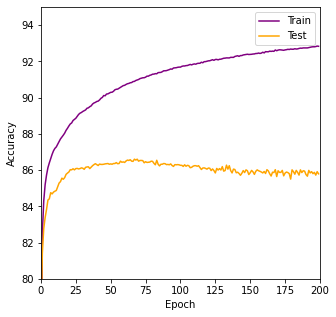

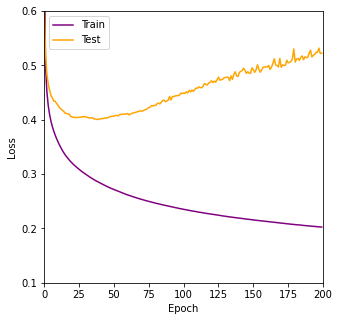

In [29]:
overfitted = log.copy()
plt.figure(figsize=(5, 5))
plt.plot(overfitted['train_accuracy'], label='Train', color = 'purple')
plt.plot(overfitted['test_accuracy'], label='Test', color = 'orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim(0, 200)
plt.ylim(80,95)
plt.legend()
plt.show()
plt.figure(figsize=(5, 5))
plt.plot(overfitted['train_loss'], label='Train', color = 'purple')
plt.plot(overfitted['test_loss'], label='Test', color = 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 200)
plt.ylim(0.1,0.6)
plt.legend()
plt.show()


<strong> the firs graph shows the accuracy in each epoch, as we can see around epoch 75, the testData accuracy begins to fall meanwhile the trainData accuracy keeps rising meaning that it has learned the trainData so good that it wont be able to predict well on the data it hasn't seen.<br>
the second graph shows the loss of each data which as we can see around epoch 30 the testData loss begins to rise as the loss for testData keeps falling.<br>
it seems that it was better for the network to have stopped around 30 epochs meaning it should have stopped earlier -early stopping-</strong>

# Reducing the dimension
<strong> we will decrease the dimension of the data level by level and output the two dimensional data as a graph to see the test and train calculations</strong>

In [30]:
EPOCHS = 30
LEARNING_RATE = 0.001
TRAINLOADER = []
INPUT_SHAPE=784
train_loader = Dataloader(trainData, trainLabels, 10, batch_size=32, shuffle=True)
for i in train_loader:
    TRAINLOADER.append(i)
TESTLOADER = []
test_loader = Dataloader(testData, testLabels, 10, batch_size=32, shuffle=True)
for i in test_loader:
    TESTLOADER.append(i)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(30, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(20, activation=Relu(), initial_weight='uniform')
network.add_layer(2, activation=Relu(), initial_weight='uniform')
network.add_layer(10, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)
log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)


Epoch 1:
	Train: Average Accuracy: 22.226666666666667	Average Loss: 1.980836909511675
	Test: Average Accuracy: 33.855830670926515	Average Loss: 1.6137905852731032
Epoch 2:
	Train: Average Accuracy: 44.81	Average Loss: 1.4035838929886784
	Test: Average Accuracy: 54.68250798722045	Average Loss: 1.199538445875247
Epoch 3:
	Train: Average Accuracy: 57.35	Average Loss: 1.1111784874880501
	Test: Average Accuracy: 64.05750798722045	Average Loss: 0.9690397772647197
Epoch 4:
	Train: Average Accuracy: 65.97	Average Loss: 0.9068483650387383
	Test: Average Accuracy: 69.42891373801918	Average Loss: 0.822319572892248
Epoch 5:
	Train: Average Accuracy: 74.655	Average Loss: 0.7568270444007579
	Test: Average Accuracy: 77.61581469648563	Average Loss: 0.6955781353007086
Epoch 6:
	Train: Average Accuracy: 78.87666666666667	Average Loss: 0.6526523154440572
	Test: Average Accuracy: 79.18330670926518	Average Loss: 0.6374757647287081
Epoch 7:
	Train: Average Accuracy: 80.55833333333334	Average Loss: 0.5986954

In [31]:
train_list = network.get_train_list()
test_list = network.get_test_list()

In [32]:
unique, counts = np.unique(trainLabels, return_counts=True)
train_dict = dict(zip(unique, counts))
unique, counts = np.unique(testLabels, return_counts=True)
test_dict = dict(zip(unique, counts))

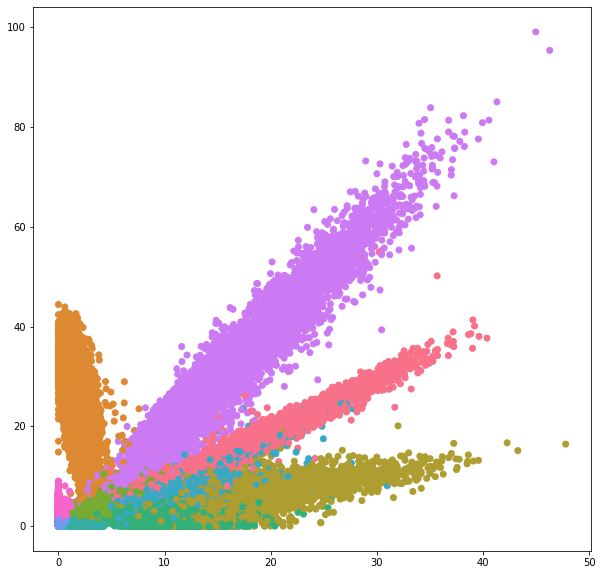

In [33]:
colors = sns.color_palette("husl", 10)
plt.figure(figsize=(10, 10))
for batch in train_list[:-1]:
    x = np.array(batch[1][:, 0]).reshape(-1)
    y = np.array(batch[1][:, 1]).reshape(-1)
    labels = np.array(batch[0].argmax(1)).reshape(-1)
    clr = [colors[labels[i]] for i in range(32)]
    plt.scatter(x,y, color=clr)
plt.show()

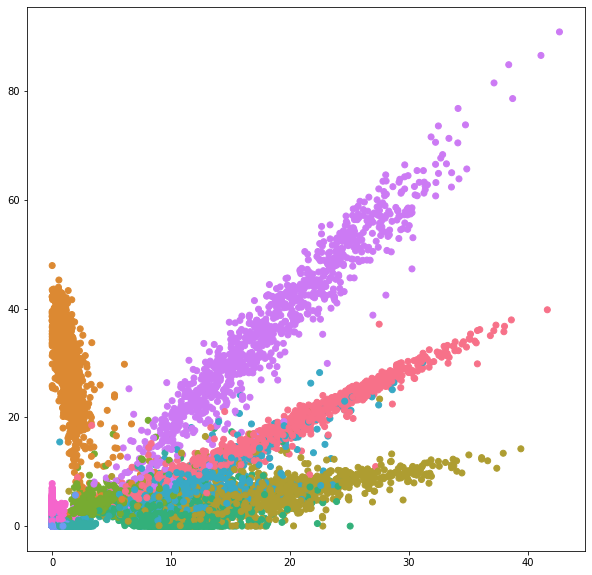

In [34]:
plt.figure(figsize=(10, 10))
for batch in test_list[:-1]:
    x = np.array(batch[1][:, 0]).reshape(-1)
    y = np.array(batch[1][:, 1]).reshape(-1)
    labels = np.array(batch[0].argmax(1)).reshape(-1)
    clr = [colors[labels[i]] for i in range(32)]
    plt.scatter(x,y, color=clr)
plt.show()

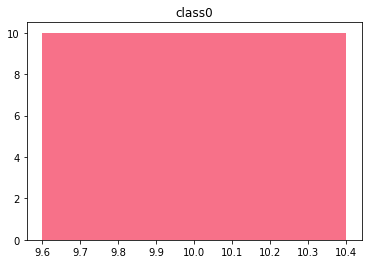

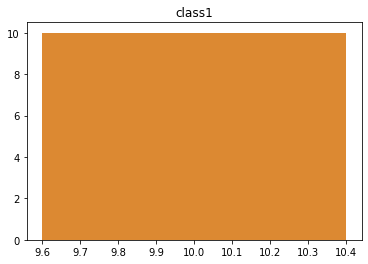

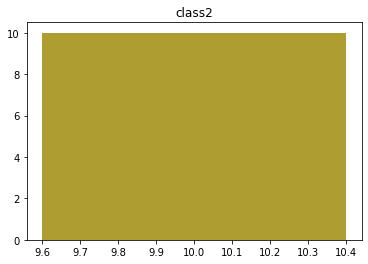

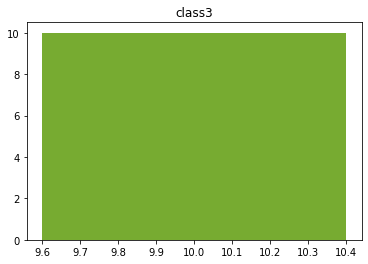

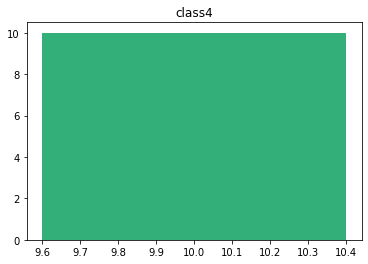

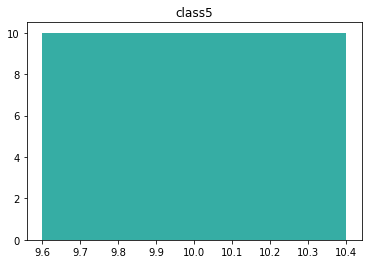

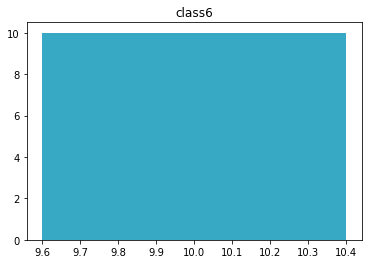

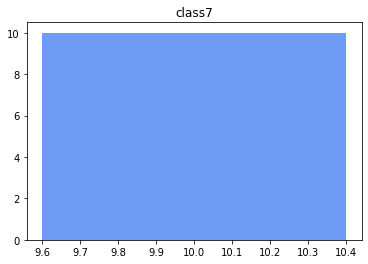

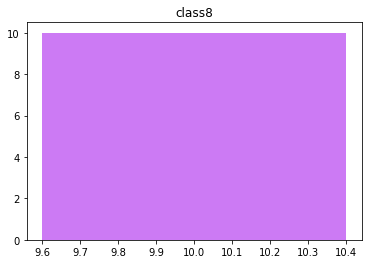

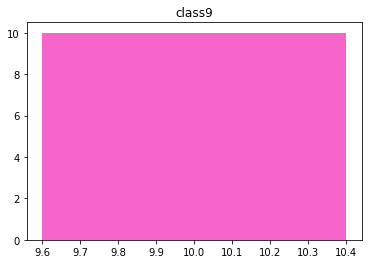

In [35]:
c = 0
for j in colors:
    plt.bar([10 for i in range(10)], [10 for i in range(10)], color = j)
    plt.title("class" + str(c))
    c += 1
    plt.show()

<strong> by the colors shown above:<br>
we understand that the network predicts classes 0, 1, 2, 3, 8 almost without any problems and perfectly.<br>
it predicts classes 4, 7, 9 with less accuracy but almost close.<br>
and at last it predicts classes 5, 6 generally good but has more errors than the other classes predicted.</strong>